In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split    

In [2]:
# load the dataset

data = pd.read_csv("co2_emissions_from_agri.csv")
data.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [3]:
# check basic info about the data (like column names and data types)
print("Data Info:")
print(data.info())



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Reta

In [4]:
# check if there are any missing values in the columns
print("\nMissing values in each column:")
print(data.isnull().sum())



Missing values in each column:
Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm 

In [5]:
# get basic summary stats 
print("\nSummary statistics:")
print(data.describe())



Summary statistics:
              Year  Savanna fires  Forest fires  Crop Residues  \
count  6965.000000    6934.000000   6872.000000    5576.000000   
mean   2005.124910    1188.390893    919.302167     998.706309   
std       8.894665    5246.287783   3720.078752    3700.345330   
min    1990.000000       0.000000      0.000000       0.000200   
25%    1997.000000       0.000000      0.000000      11.006525   
50%    2005.000000       1.651850      0.517900     103.698200   
75%    2013.000000     111.081400     64.950775     377.640975   
max    2020.000000  114616.401100  52227.630600   33490.074100   

       Rice Cultivation  Drained organic soils (CO2)  \
count       6965.000000                  6965.000000   
mean        4259.666673                  3503.228636   
std        17613.825187                 15861.445678   
min            0.000000                     0.000000   
25%          181.260800                     0.000000   
50%          534.817400                     0.00

# Step 1: Exploring the Data

After loading the dataset and checking the summary statistics, a few things stand out:

## 1. Missing Data
Some columns like **Crop Residues** and **Forestland** have fewer records than others.  
This means there are **missing values** that will need to be cleaned or filled in later.

## 2. Large Ranges
Many columns have **very large maximum values**, for example:
- Savanna fires: up to **114,616**
- Forest fires: up to **52,227**
- Rice Cultivation: up to **164,915**
- Drained organic soils (CO2): up to **241,025**

These big ranges show that some countries or years have **much higher emissions** than others.  
We’ll need to **scale or normalize** the data before doing regression.

## 3. Negative Forestland Values
The **Forestland** column has **negative numbers**, which likely mean **deforestation** (loss of forest area).  
This makes sense in the context of emissions data but is worth keeping in mind.

## 4. Many Zero Values
Several columns like *Savanna fires*, *Forest fires*, and *Drained organic soils* have lots of zeros.  
That probably means that some areas **didn’t report or experience** those activities.

## 5. Outliers
Some features have **extreme values** compared to their averages.  
These **outliers** could affect the model’s accuracy, so they may need to be handled or at least noted during analysis.

---

**Summary:**  
The dataset has **missing values, uneven scales, outliers, and negative forestland values**.  
We’ll need to clean and prepare the data carefully before running the regression model.


In [32]:
# reload the clean data
data = pd.read_csv("co2_emissions_from_agri.csv")

# check the column names again
print(data.columns)


Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')


In [33]:
# rename the temperature column
data = data.rename(columns={"Average Temperature °C": "Average_Temperature_C"})

# turn the 'Area' column (text) into numbers using one-hot encoding
# this helps the model understand it
data = pd.get_dummies(data, columns=['Area'], drop_first=True)


In [34]:
print(data.columns)


Index(['Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion',
       ...
       'Area_Uzbekistan', 'Area_Vanuatu',
       'Area_Venezuela (Bolivarian Republic of)', 'Area_Viet Nam',
       'Area_Wallis and Futuna Islands', 'Area_Western Sahara', 'Area_Yemen',
       'Area_Yugoslav SFR', 'Area_Zambia', 'Area_Zimbabwe'],
      dtype='object', length=265)


In [30]:
# X will have all the features (independent variables)
# y will be the target (Average Temperature)
X = data.drop("Average_Temperature_C", axis=1)
y = data["Average_Temperature_C"]



This gives an overview of the columns, data types, and if there are any missing values.


In [44]:
# get summary statistics for the numeric columns
print("\n--- Summary Statistics ---")
print(data.describe())



--- Summary Statistics ---
              Year  Savanna fires  Forest fires  Crop Residues  \
count  6965.000000    6934.000000   6872.000000    5576.000000   
mean   2005.124910    1188.390893    919.302167     998.706309   
std       8.894665    5246.287783   3720.078752    3700.345330   
min    1990.000000       0.000000      0.000000       0.000200   
25%    1997.000000       0.000000      0.000000      11.006525   
50%    2005.000000       1.651850      0.517900     103.698200   
75%    2013.000000     111.081400     64.950775     377.640975   
max    2020.000000  114616.401100  52227.630600   33490.074100   

       Rice Cultivation  Drained organic soils (CO2)  \
count       6965.000000                  6965.000000   
mean        4259.666673                  3503.228636   
std        17613.825187                 15861.445678   
min            0.000000                     0.000000   
25%          181.260800                     0.000000   
50%          534.817400                  

In [46]:
# check how many missing values each column has
print(data.isnull().sum())


Year                      0
Savanna fires            31
Forest fires             93
Crop Residues          1389
Rice Cultivation          0
                       ... 
Area_Western Sahara       0
Area_Yemen                0
Area_Yugoslav SFR         0
Area_Zambia               0
Area_Zimbabwe             0
Length: 265, dtype: int64


In [47]:
# fill missing values with the mean for each column
data = data.fillna(data.mean(numeric_only=True))


In [48]:
# check again to make sure there are no more missing values
print("\nMissing values after filling:")
print(data.isnull().sum())



Missing values after filling:
Year                   0
Savanna fires          0
Forest fires           0
Crop Residues          0
Rice Cultivation       0
                      ..
Area_Western Sahara    0
Area_Yemen             0
Area_Yugoslav SFR      0
Area_Zambia            0
Area_Zimbabwe          0
Length: 265, dtype: int64


# Step 3: Exploratory Data Analysis (EDA)

This step explores the dataset to understand its structure, main patterns, and how different features relate to the target variable (Average Temperature).


In [49]:
# check how each column relates to temperature
corr = data.corr(numeric_only=True)["Average_Temperature_C"].sort_values(ascending=False)

# show top 10 most related columns
print("\nTop 10 features most correlated with temperature:")
print(corr.head(10))

# show 10 least related columns
print("\n10 features least correlated with temperature:")
print(corr.tail(10))



Top 10 features most correlated with temperature:
Average_Temperature_C      1.000000
Year                       0.545932
Food Transport             0.075724
Area_Estonia               0.075550
Food Retail                0.073404
Area_Belarus               0.072437
Area_Latvia                0.071144
Area_Russian Federation    0.071026
Area_Finland               0.069664
Area_Luxembourg            0.066571
Name: Average_Temperature_C, dtype: float64

10 features least correlated with temperature:
Area_Saint Pierre and Miquelon          -0.051510
Area_New Zealand                        -0.052952
Area_Nepal                              -0.053055
Area_Bangladesh                         -0.054726
Area_Botswana                           -0.056790
Area_Chile                              -0.058586
Area_Zimbabwe                           -0.066460
Area_Marshall Islands                   -0.071821
Area_Cook Islands                       -0.075245
Area_Micronesia (Federated States of)   -0.0758

In [50]:
# check how each column relates to temperature (using absolute correlation)
corr = data.corr(numeric_only=True)["Average_Temperature_C"].abs().sort_values(ascending=False)

# show top 10 features most strongly related to temperature
print("\nTop 10 features most correlated with temperature (absolute):")
print(corr.head(10))

# show 10 features least related to temperature
print("\n10 features least correlated with temperature (absolute):")
print(corr.tail(10))



Top 10 features most correlated with temperature (absolute):
Average_Temperature_C                    1.000000
Year                                     0.545932
Area_Micronesia (Federated States of)    0.075854
Food Transport                           0.075724
Area_Estonia                             0.075550
Area_Cook Islands                        0.075245
Food Retail                              0.073404
Area_Belarus                             0.072437
Area_Marshall Islands                    0.071821
Area_Latvia                              0.071144
Name: Average_Temperature_C, dtype: float64

10 features least correlated with temperature (absolute):
Area_Lao People's Democratic Republic                        0.002647
Area_Brunei Darussalam                                       0.002569
Area_United Kingdom of Great Britain and Northern Ireland    0.002526
Area_Thailand                                                0.002407
Area_Malaysia                                          

Here I used the **absolute correlation**, which means I focused on how strong the relationship is,
not whether it is positive or negative.

This helps find the variables that have the biggest overall effect on temperature,
no matter the direction of the relationship.

EDA helped to understand the dataset better.  
I found that:
- Temperature values mostly range between 0°C and 2°C.  
- Some variables like emissions and energy use show moderate correlation with temperature.  
- Others, like population, have weaker or no clear relationship.  

This gives a good understanding of what to expect before building the regression model.



# Step 4: Model Building and Evaluation

In this step, I split the data, trained three different regression models, and compared how well each model predicted average temperature.


In [53]:
from sklearn.model_selection import train_test_split

# split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 5572
Testing samples: 1393


The dataset was divided into 80% training and 20% testing.
The training data is used to teach the model, while the test data checks how well it performs on unseen data.


### Handling Non-Numeric Data
The dataset included a text column ("Area") representing countries or regions.
Since this information is important, it was not removed.
Instead, I converted it into numeric form using one-hot encoding.
This allowed all models to use regional information while still working with numeric inputs.
Scaling was applied only to the models that required it (Linear and Ridge Regression).

In [57]:
# check for missing values
print("Missing values before scaling:", X_train.isnull().sum().sum())

# fill missing values with the column mean (or 0 if you prefer)
X_train = X_train.fillna(X_train.mean(numeric_only=True))
X_test = X_test.fillna(X_test.mean(numeric_only=True))

print("Missing values after fill:", X_train.isnull().sum().sum())


Missing values before scaling: 5355
Missing values after fill: 0


These three models represent a simple linear approach, a regularized version, and a more flexible tree-based model.


In [59]:

# scale for linear & ridge
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



#  Step 5: Train and Evaluate Models

In this step, I trained and evaluated three different regression models to predict the average temperature using agricultural and environmental data.

## Models Used
1. **Linear Regression** – a simple baseline model  
2. **Ridge Regression** – similar to linear regression but includes regularization to reduce overfitting  
3. **Random Forest Regressor** – a tree-based model that captures complex, non-linear relationships

## Evaluation Metrics
The models were compared using three common evaluation metrics:

- **R² Score** → Measures how well the model explains the variation in the data  
  *(Higher is better)*  
- **MAE (Mean Absolute Error)** → Shows the average size of the prediction errors  
  *(Lower is better)*  
- **RMSE (Root Mean Squared Error)** → Similar to MAE but gives more weight to larger errors  
  *(Lower is better)*

After training and testing each model, the results were collected and compared using these metrics to determine which model performed best.


In [61]:
# import the models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

# create model objects
model_linear = LinearRegression()
model_ridge = Ridge(alpha=1.0)
model_rf = RandomForestRegressor(random_state=42, n_estimators=300)

# fit models
model_linear.fit(X_train_scaled, y_train)
model_ridge.fit(X_train_scaled, y_train)
model_rf.fit(X_train, y_train)  # Random forest doesn’t need scaled data

print("All models trained successfully.")


All models trained successfully.


# Step 5: Train and Evaluate Models

In [64]:
# Step 5: Evaluate Models (simple and easy to read)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# make predictions
y_pred_linear = model_linear.predict(X_test_scaled)
y_pred_ridge  = model_ridge.predict(X_test_scaled)
y_pred_rf     = model_rf.predict(X_test)

# calculate metrics one by one
r2_linear = r2_score(y_test, y_pred_linear)
r2_ridge  = r2_score(y_test, y_pred_ridge)
r2_rf     = r2_score(y_test, y_pred_rf)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_ridge  = mean_absolute_error(y_test, y_pred_ridge)
mae_rf     = mean_absolute_error(y_test, y_pred_rf)

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_ridge  = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
rmse_rf     = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# print results in a clean way
print("Model Performance:")
print("-------------------")
print(f"Linear Regression  -> R2: {r2_linear:.3f}, MAE: {mae_linear:.3f}, RMSE: {rmse_linear:.3f}")
print(f"Ridge Regression   -> R2: {r2_ridge:.3f}, MAE: {mae_ridge:.3f}, RMSE: {rmse_ridge:.3f}")
print(f"Random Forest      -> R2: {r2_rf:.3f}, MAE: {mae_rf:.3f}, RMSE: {rmse_rf:.3f}")


Model Performance:
-------------------
Linear Regression  -> R2: 0.516, MAE: 0.285, RMSE: 0.385
Ridge Regression   -> R2: 0.517, MAE: 0.286, RMSE: 0.385
Random Forest      -> R2: 0.640, MAE: 0.244, RMSE: 0.332


# Step 5: Train and Evaluate Models

I trained three models to predict the average temperature:
Linear Regression, Ridge Regression, and Random Forest Regressor.

To check how well they worked, I used three basic metrics:
R2 score, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).

The results were:

Linear Regression -> R2: 0.516, MAE: 0.285, RMSE: 0.385  
Ridge Regression  -> R2: 0.517, MAE: 0.286, RMSE: 0.385  
Random Forest     -> R2: 0.640, MAE: 0.244, RMSE: 0.332  

From the results, Random Forest performed the best because it had the highest R2 score and the lowest error values.
The linear and ridge models gave similar results, but Random Forest was more accurate overall.


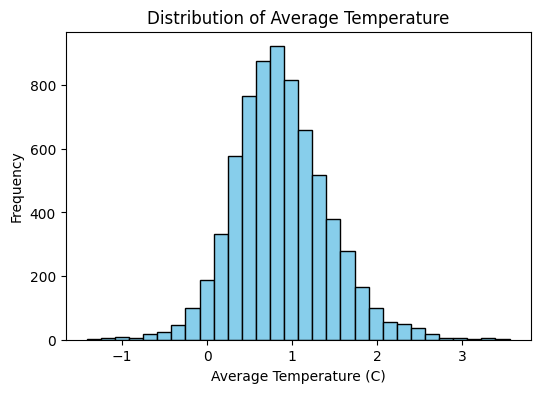

In [65]:
# Histogram for Average Temperature
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(data["Average_Temperature_C"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Average Temperature")
plt.xlabel("Average Temperature (C)")
plt.ylabel("Frequency")
plt.show()


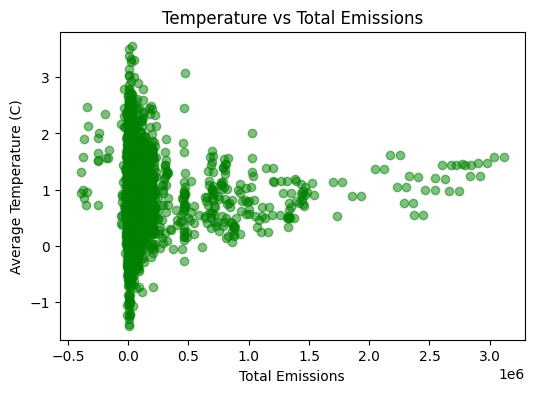

In [66]:
# Scatter plot: Temperature vs Total Emissions
plt.figure(figsize=(6,4))
plt.scatter(data["total_emission"], data["Average_Temperature_C"], alpha=0.5, color='green')
plt.title("Temperature vs Total Emissions")
plt.xlabel("Total Emissions")
plt.ylabel("Average Temperature (C)")
plt.show()


### Visualization
I created a histogram to see how temperature values are distributed,
and a scatter plot to check how temperature changes with emissions .
The scatter plot shows a slight upward trend, meaning higher emissions
are linked to slightly higher average temperatures.
